In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [39]:
df=pd.read_csv(r"D:\Excel R\Data Science Assignments\Multiple Linear Regression\50_startups.csv")

In [40]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [41]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [42]:
df.shape

(50, 5)

In [43]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [44]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [45]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [46]:
df.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

# PreProcessing

# 4 Bussiness moments

In [47]:
df.mean()

R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
dtype: float64

In [48]:
df.median()

R&D Spend           73051.080
Administration     122699.795
Marketing Spend    212716.240
Profit             107978.190
dtype: float64

In [49]:
df.skew()

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

In [50]:
df.var()

R&D Spend          2.107017e+09
Administration     7.849973e+08
Marketing Spend    1.495492e+10
Profit             1.624588e+09
dtype: float64

In [51]:
df.kurtosis()

R&D Spend         -0.761465
Administration     0.225071
Marketing Spend   -0.671701
Profit            -0.063859
dtype: float64

Missing Values

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [53]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [54]:
df=df.rename({"R&D Spend":"R_D",
             "Administration":"Admin",
             "Marketing Spend":"MS"},axis=1)

In [55]:
#One hot Encoding by  using get dummies
df=pd.get_dummies(df,columns=['State'])

In [56]:
df=df.rename({"State_New York":"St_NY",
              "State_Florida":"St_F",
              "State_California":"St_C"},axis=1)

In [57]:
df.head(6)

,R_D,Admin,MS,Profit,St_C,St_F,St_NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1


Check For Outliers 

<AxesSubplot:>

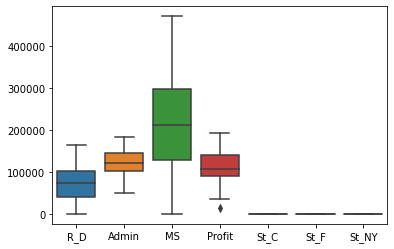

In [58]:
sns.boxplot(data=df)

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

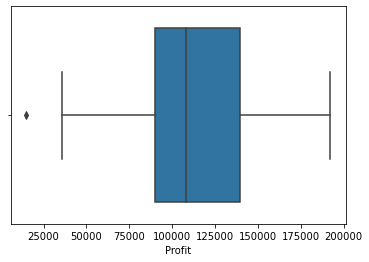

In [59]:
sns.boxplot(df.Profit) # Target variable containg the one Out liers it was based on Profit of the company so Neglet the Outliers

# Plots and Graphs

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='St_C', ylabel='Density'>

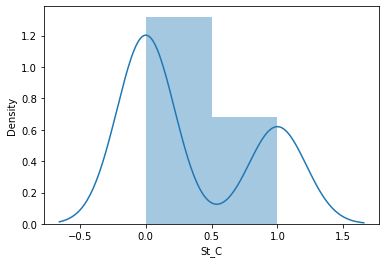

In [60]:
sns.distplot(df['St_C'])# California

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='St_F', ylabel='Density'>

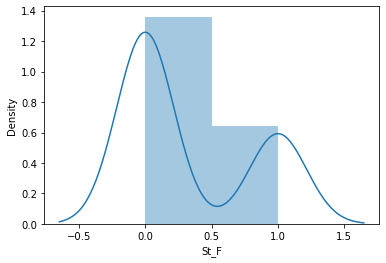

In [61]:
sns.distplot(df['St_F'])# Florida

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='St_C', ylabel='Density'>

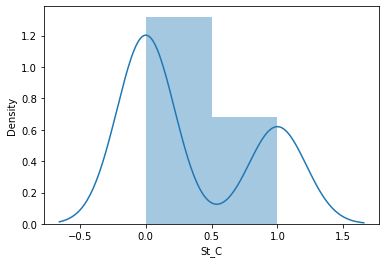

In [62]:
sns.distplot(df['St_C'])# NewYork

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_D', ylabel='Density'>

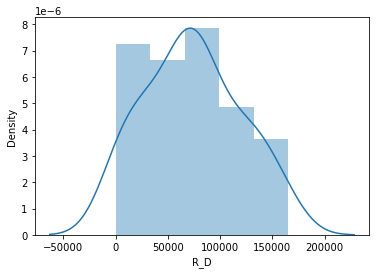

In [63]:
sns.distplot(df['R_D'])# Reasearch and Developement Spend

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Admin', ylabel='Density'>

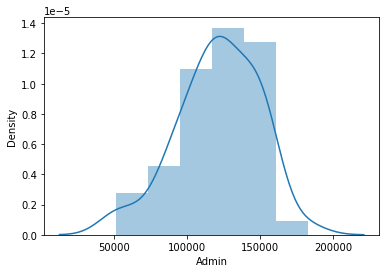

In [64]:
sns.distplot(df['Admin'])# Adminstartion Spend

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS', ylabel='Density'>

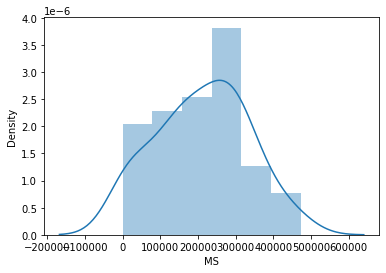

In [65]:
sns.distplot(df['MS'])# Marketing  Spend

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

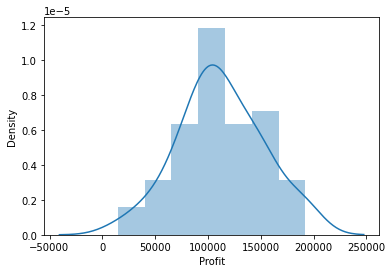

In [66]:
sns.distplot(df['Profit'])# Taeget Profit ## the profit the perfectly Normal Distribution. data ranges betwween -5000 to 250000

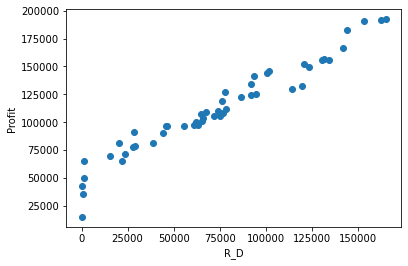

In [67]:
# Here the Relationship between =========> postive Corelation +1
plt.scatter(x='R_D',y='Profit',data=df)
plt.xlabel('R_D')
plt.ylabel('Profit')
plt.show()

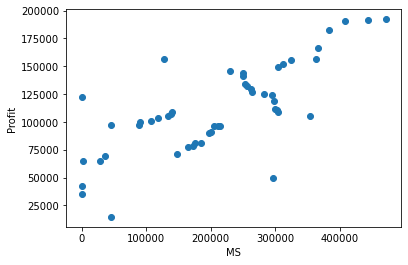

In [68]:
# Here the Relationship between =========> postive Corelation 1
plt.scatter(x='MS',y='Profit',data=df)
plt.xlabel('MS')
plt.ylabel('Profit')
plt.show()

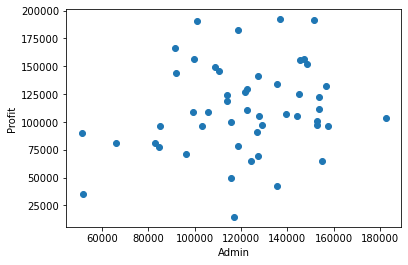

In [69]:
# Here the Relationship  =========> No Corelation between Profit and Admin 0
plt.scatter(x='Admin',y='Profit',data=df)
plt.xlabel('Admin')
plt.ylabel('Profit')
plt.show()

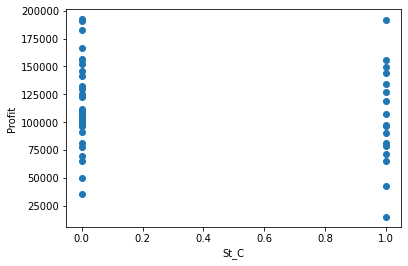

In [70]:
plt.scatter(x='St_C',y='Profit',data=df)
plt.xlabel('St_C')
plt.ylabel('Profit')
plt.show()

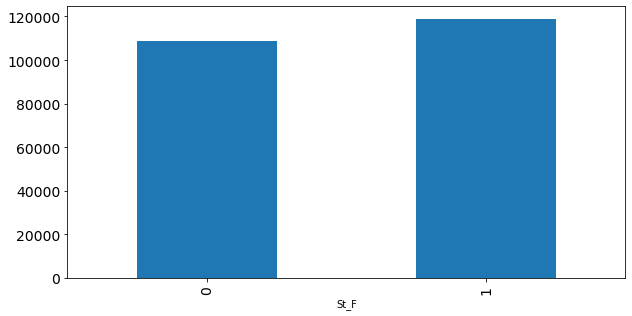

In [71]:
bar=df.groupby(df['St_F'])['Profit'].mean().plot.bar( figsize=(10,5),fontsize=14)

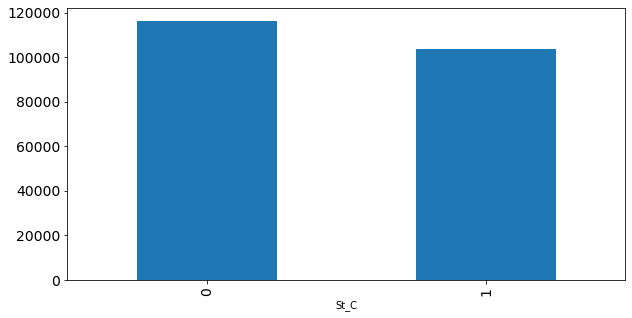

In [72]:
bar=df.groupby(df['St_C'])['Profit'].mean().plot.bar( figsize=(10,5),fontsize=14)

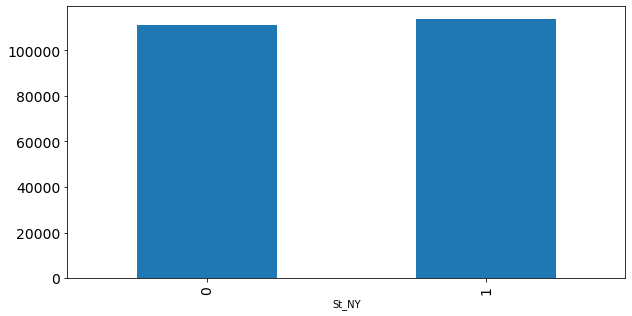

In [73]:
bar=df.groupby(df['St_NY'])['Profit'].mean().plot.bar( figsize=(10,5),fontsize=14)

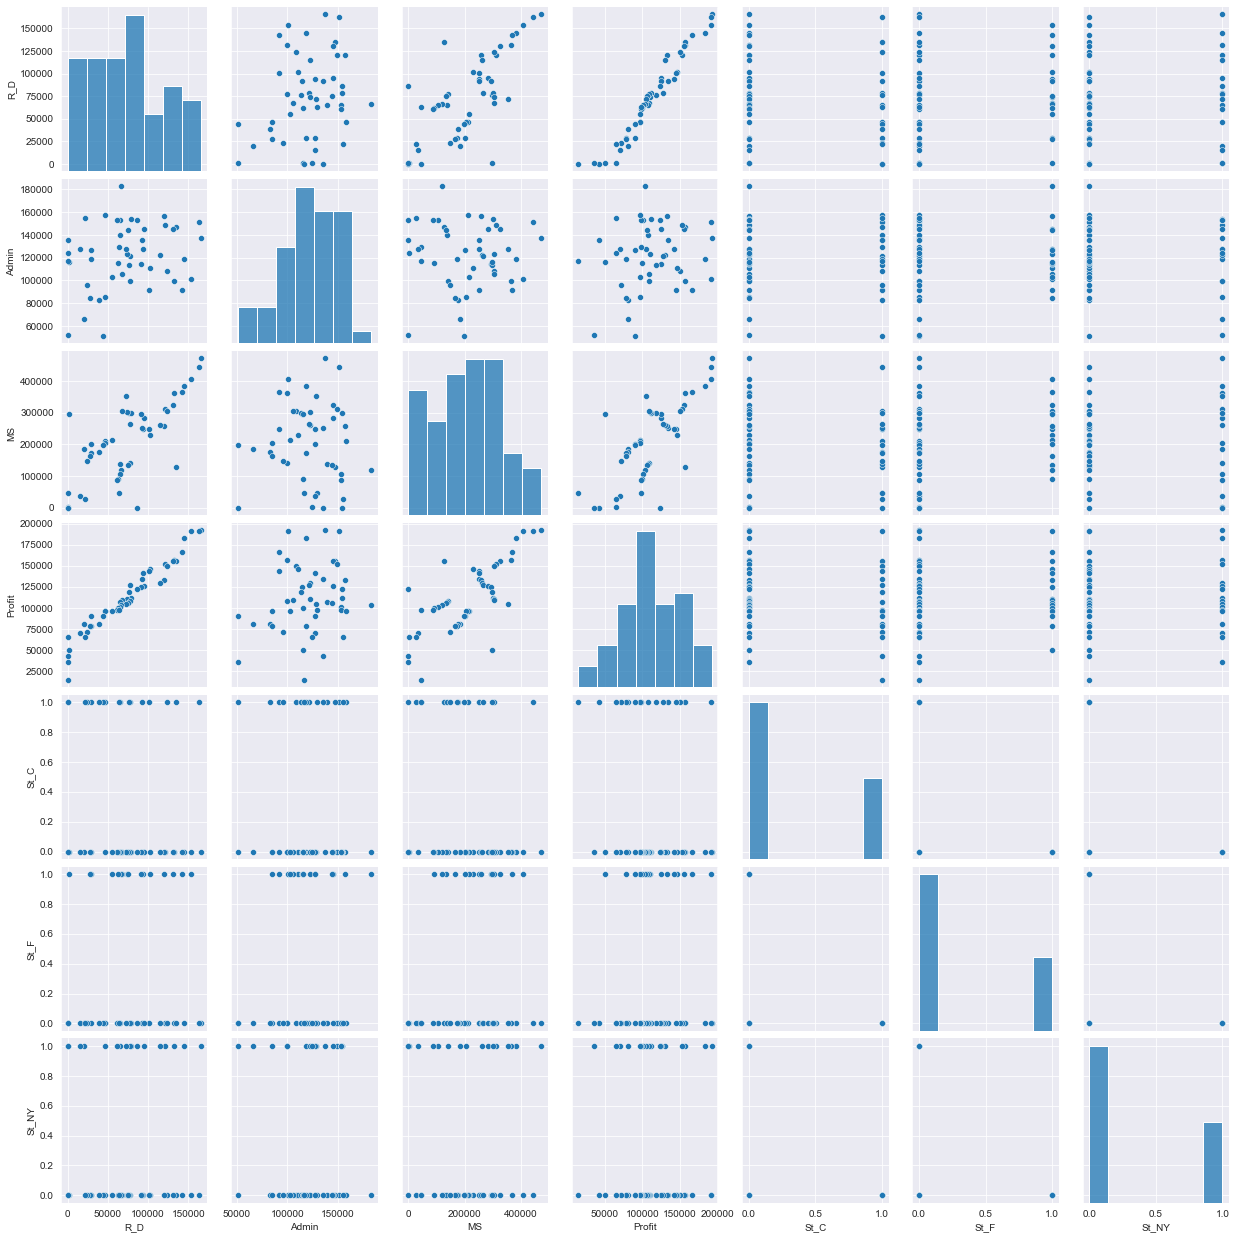

In [74]:
##plot Scatter plot between all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Correlation Matrix

In [75]:
#Now Checking the Corelation between the parameters
df.corr()

,R_D,Admin,MS,Profit,St_C,St_F,St_NY
R_D,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
St_C,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
St_F,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
St_NY,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


# Check for the Best Model

In [76]:
x=df[["R_D","Admin","MS","St_C","St_F","St_NY"]]
y=df["Profit"]

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [78]:
from sklearn import linear_model
regressor=linear_model.LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [79]:
predicted=regressor.predict(x_test)
predicted

array([ 97886.52854488, 100689.59753431,  50766.18448374,  66829.09134731,
        46799.45010528, 189232.29587132, 128691.24829827, 170348.90916936,
       135737.68395054, 180434.30891557])

In [80]:
from  sklearn.metrics import  mean_squared_error,r2_score
mse=mean_squared_error(y_test,predicted)
print(mse)

207075894.95690063


In [81]:
rmse=np.sqrt(mse)
rmse

14390.131860302761

In [82]:
r2=r2_score(y_test,predicted)
r2

0.9297662471340559

# Implementing OLS Method

In [144]:
import statsmodels.formula.api as smf
all_variables=smf.ols("Profit~R_D+Admin+MS+St_C+St_F+St_NY",data=df).fit()

In [145]:
all_variables.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 23 May 2021   Prob (F-statistic):           1.34e-27
Time:                        18:46:51   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
R_D            0.8060      0.046     17.369      0.000       0.712       0.900
Admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS             0.0270      0.017      1.574      0.123      -0.008       0.062
St_C        1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
St_F        1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
St_NY       1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.63e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [146]:
all_variables.aic,all_variables.rsquared

(1062.764909597834, 0.9507524843355148)

Here we have Multiple in-Significant Featuers  which means Which are not fit for you model.
features are ( Adminstartion and Market Spend) based on P value wich are greater than 0.05 value
Now check for is there any problem called Multicollinearity by using (Simple Linear Regression)


here chechking for the First In-Significant feature's Independentally  for MultiColinearity==> (0.162) greater than 0.05 Again it becames In-Significant Feature

In [87]:
ad_slr=smf.ols("Profit~Admin",data=df).fit()

In [88]:
ad_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 23 May 2021   Prob (F-statistic):              0.162
Time:                        18:32:13   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

here chechking for  the  Second In-Significant feature's Independentally  for MultiColinearity==> It Became Significant Feature whose p value is 0 which is less than 0.05

In [89]:
ms_slr=smf.ols("Profit~MS",data=df).fit()

In [90]:
ms_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 23 May 2021   Prob (F-statistic):           4.38e-10
Time:                        18:32:13   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now check Both first and Second In-Significant variable by Combining ==> Here we got again One Significant and Another one In-Significant feature

In [140]:
with_both=smf.ols("Profit~Admin+MS",data=df).fit()

In [141]:
with_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 23 May 2021   Prob (F-statistic):           2.50e-10
Time:                        18:46:08   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Admin          0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
with_both.rsquared,with_both.aic

(0.6097229746770663, 1160.2648038638672)

now check the corelation between Admin and MS because  if they are identically Correlated are not 

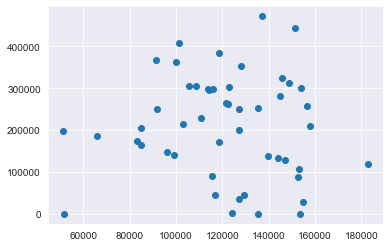

In [93]:
plt.scatter(x='Admin',y='MS',data=df)# NO Correlation between independent varibales

Check by Removing one Feature by another and check the R^2 and Aic Values based on these choose the Best fit Model Excluding Adminstartion Spend

In [156]:
out_admin=smf.ols("Profit~R_D+MS+St_C+St_F+St_NY",data=df).fit()

In [157]:
out_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sun, 23 May 2021   Prob (F-statistic):           9.72e-29
Time:                        18:54:29   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.525e+04   2100.376     16.782      0.000     3.1e+04    3.95e+04
R_D            0.7967      0.042     18.771      0.000       0.711       0.882
MS             0.0298      0.016      1.842      0.072      -0.003       0.062
St_C        1.171e+04   1910.312      6.130      0.000    7861.854    1.56e+04
St_F        1.185e+04   2170.903      5.459      0.000    7477.785    1.62e+04
St_NY       1.169e+04   1988.428      5.879      0.000    7684.996    1.57e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     2.25e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.49e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [158]:
out_admin.rsquared,out_admin.aic

(0.950453304509085, 1061.067741856422)

Here Model1 got All the Significant variables and their p values are less than 0.05 They have R^2 ==>0.950 and adj R^2 ==> 0.946 and AIC Value is 1061

Removing Marketing Spend we have here In-Significant Feature p values are greater than 0.05 Admin becames again In-Significant

In [159]:
out_ms=smf.ols("Profit~R_D+Admin+St_C+St_F+St_NY",data=df).fit()

In [160]:
out_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sun, 23 May 2021   Prob (F-statistic):           2.90e-28
Time:                        18:54:43   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.122e+04   4607.941      8.945      0.000    3.19e+04    5.05e+04
R_D            0.8609      0.031     27.665      0.000       0.798       0.924
Admin         -0.0527      0.050     -1.045      0.301      -0.154       0.049
St_C        1.339e+04   2421.500      5.529      0.000    8511.111    1.83e+04
St_F        1.448e+04   2518.987      5.748      0.000    9405.870    1.96e+04
St_NY       1.335e+04   2459.306      5.428      0.000    8395.623    1.83e+04
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     3.47e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.97e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [161]:
out_ms.rsquared,out_ms.aic

(0.9479799298023537, 1063.503443921346)

# Here There is NO Multicollinearity Problem So we are Not Finding VIF values 

# Model Validation Techniques

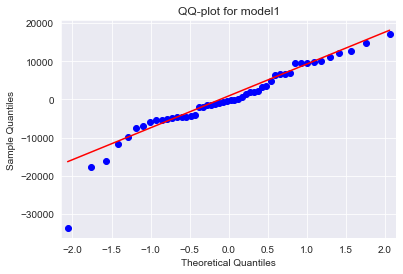

In [192]:
import statsmodels.api as sm
qqplot=sm.qqplot(out_admin.resid,line='q')
plt.title('QQ-plot for model1')
plt.show()

In [196]:
list(np.where(out_admin.resid<(-10000)))

[array([14, 15, 48, 49], dtype=int64)]

# Model Validation Techniques

By Using Standardization Technique

In [189]:
## Here we are going to Standardize the data
def get_stnd_data(vals):
    return(vals-vals.mean())/vals.std()

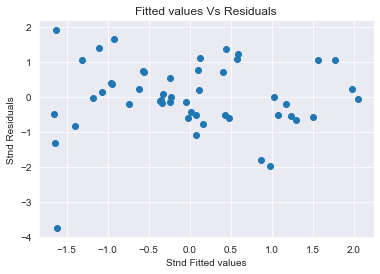

In [199]:
plt.scatter(get_stnd_data(out_admin.fittedvalues),
           get_stnd_data(out_admin.resid))

plt.title("Fitted values Vs Residuals")
plt.xlabel('Stnd Fitted values')
plt.ylabel('Stnd Residuals')
plt.show()

By Using Normalization Technique

In [103]:
# here first we are going to Normalize  the data 
def normal_data(x):
    return(x - x.min()/(x.max()-x.min()))

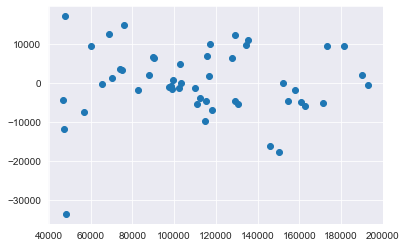

In [198]:
plt.scatter(normal_data(out_admin.fittedvalues),
           normal_data(out_admin.resid))
plt.show()

Both Standardization and Normalization Techniques are Same The are Removing the Scaling 

Residuals Vs Regressors

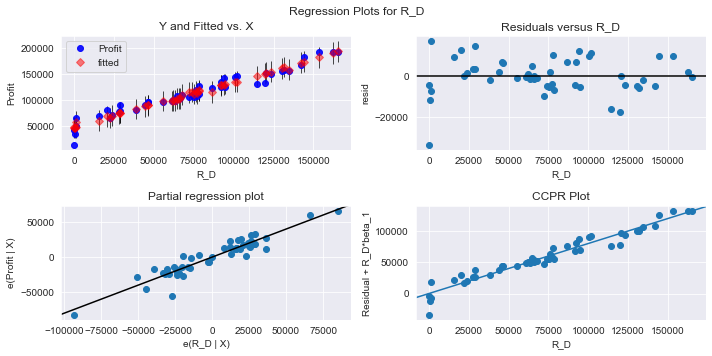

In [200]:
#2
fig =plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(out_admin,"R_D",fig=fig)
plt.show()

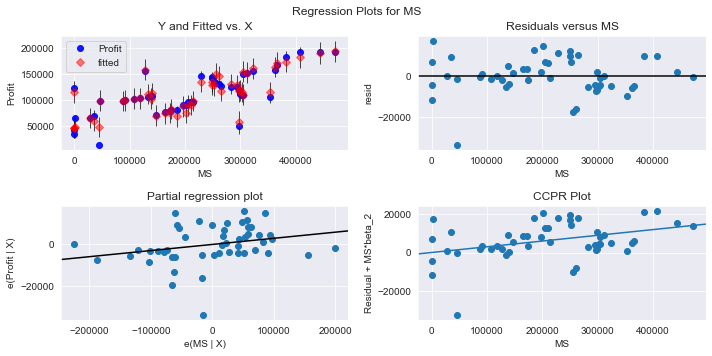

In [201]:
#1
fig =plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(out_admin,"MS",fig=fig)
plt.show()

# Model Deletion Diagnostics

In [107]:
#1 
#cooks Distance and Influence PLot  which helps in Detecting the outliers  and Influential observations


In [108]:
model_influence=model1.get_influence()
(c,_) = model_influence.cooks_distance

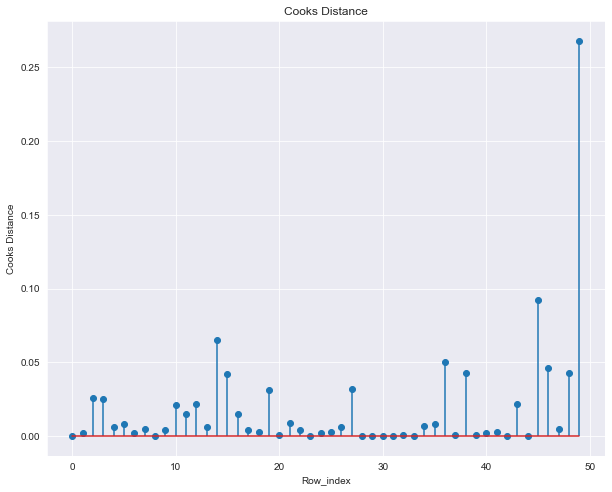

In [109]:
fig=plt.subplots(figsize=(10,8))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row_index')
plt.ylabel('Cooks Distance')
plt.title('Cooks Distance')
plt.show()

In [110]:
(np.argmax(c),np.max(c)) # 49 th one placed in 0.283..

(49, 0.26831865039824115)

High Influence Plots

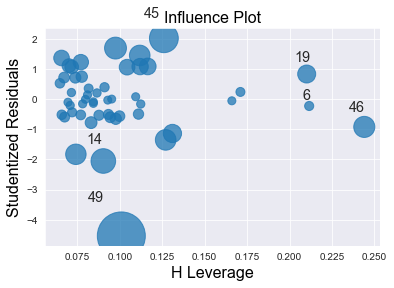

In [111]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [112]:
# Calculate the Liverage Vlaue (3*(k+1)/n)
k=df.shape[1]
n=df.shape[0]
lv= 3*((k+1)/n)
lv

0.48

By seeing above graph 49, 14, 46 are the influencers

In [113]:
df[df.index.isin([49,14,46])]

,R_D,Admin,MS,Profit,St_C,St_F,St_NY
14,119943.24,156547.42,256512.92,132602.65,0,1,0
46,1315.46,115816.21,297114.46,49490.75,0,1,0
49,0.00,116983.80,45173.06,14681.40,1,0,0


In [114]:
df.head()

,R_D,Admin,MS,Profit,St_C,St_F,St_NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


# Improving The Model Final Model


In [115]:
startup=pd.read_csv(r"D:\Excel R\Data Science Assignments\Multiple Linear Regression\50_startups.csv")

In [116]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Droping The Influential Observations

In [117]:
pro = startup.drop(startup.index[[14,49,45]],axis=0).reset_index()


In [118]:
pro

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [119]:
pro=pd.get_dummies(pro,columns=['State'])

In [120]:
pro=pro.rename({"R&D Spend":"R_D",
             "Administration":"Admin",
             "Marketing Spend":"MS",
               "State_New York":"St_NY",
                "State_Florida":"St_F",
                "State_California":"St_C"
               },axis=1)

In [121]:
pro

,index,R_D,Admin,MS,Profit,St_C,St_F,St_NY
0,0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [122]:
# With out Admin 
final_model=smf.ols("Profit~R_D+MS+St_C+St_F+St_NY",data=pro).fit()

In [123]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     326.0
Date:                Sun, 23 May 2021   Prob (F-statistic):           5.09e-31
Time:                        18:32:37   Log-Likelihood:                -480.59
No. Observations:                  47   AIC:                             971.2
Df Residuals:                      42   BIC:                             980.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.605e+04   1713.460     21.038      0.000    3.26e+04    3.95e+04
R_D            0.7982      0.033     24.215      0.000       0.732       0.865
MS             0.0277      0.012      2.246      0.030       0.003       0.053
St_C         1.33e+04   1496.324      8.885      0.000    1.03e+04    1.63e+04
St_F        1.261e+04   1673.412      7.537      0.000    9235.261     1.6e+04
St_NY       1.014e+04   1579.082      6.421      0.000    6953.318    1.33e+04
==============================================================================
Omnibus:                        1.383   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.338
Skew:                           0.305   Prob(JB):                        0.512
Kurtosis:                       2.441   Cond. No.                     2.60e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.73e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [132]:
final_model.rsquared

0.9657826367732486

In [133]:
final_model.aic

975.5262811447622

In [126]:
#Final include variable With  Admin

In [134]:
final_mdl=smf.ols("Profit~R_D+Admin+St_C+St_F+St_NY",data=pro).fit()

In [135]:
final_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     296.4
Date:                Sun, 23 May 2021   Prob (F-statistic):           3.53e-30
Time:                        18:33:17   Log-Likelihood:                -482.76
No. Observations:                  47   AIC:                             975.5
Df Residuals:                      42   BIC:                             984.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.073e+04   3616.472     11.262      0.000    3.34e+04     4.8e+04
R_D            0.8554      0.026     33.495      0.000       0.804       0.907
Admin         -0.0374      0.040     -0.948      0.349      -0.117       0.042
St_C        1.452e+04   1933.567      7.509      0.000    1.06e+04    1.84e+04
St_F        1.478e+04   1947.058      7.592      0.000    1.09e+04    1.87e+04
St_NY       1.143e+04   1969.494      5.802      0.000    7452.763    1.54e+04
==============================================================================
Omnibus:                        0.241   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.376
Skew:                           0.149   Prob(JB):                        0.828
Kurtosis:                       2.678   Cond. No.                     1.60e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.99e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [170]:
final_mdl.adj_rsquared

AttributeError: 'OLSResults' object has no attribute 'adj_rsquared'

In [136]:
#print(final_modl.rsquared)
final_mdl.aic # aic values is  increased

975.5262811447622

In [137]:
final_mdl.rsquared

0.9657826367732486

In [131]:
#final_modl ==> here it is not that much effictive model because 
#AIC==975 the previous
#AIC==971
#which means final_mdl is working great

# Comparing R^ 2 Table  with other Models

In [164]:
d1=pd.DataFrame({'Models':["all_variables","Admin & MS ","with out Admin ","With out MS ","Final Model"],
                 "R_Squred_values" : [all_variables.rsquared,with_both.rsquared,out_admin.rsquared,out_ms.rsquared,final_model.rsquared]})
R_squares=pd.DataFrame(d1)

In [165]:
R_squares

,Models,R_Squred_values
0,all_variables,0.950752
1,Admin & MS,0.609723
2,with out Admin,0.950453
3,With out MS,0.947980
4,Final Model,0.965783


In [178]:
d2=pd.DataFrame({'Models':['All variabels','with admin & Ms','without Admin','without Ms','Final Model'],
                'Aic_values':[all_variables.aic,with_both.aic,out_admin.aic,out_ms.aic,final_model.aic]})

Aic_values=pd.DataFrame(d2)
Aic_values

,Models,Aic_values
0,All variabels,1062.764910
1,with admin & Ms,1160.264804
2,without Admin,1061.067742
3,without Ms,1063.503444
4,Final Model,975.526281


What ever the Aic value is Low value that is Best  Fit  Model

In [176]:
d3= pd.DataFrame({'Models':['All variabels','with admin & Ms','without Admin','without Ms','Final Model'],
                 "Adj_rsquares":[0.945,0.593,0.966,0.963,0.966]})
Adj_rsquares=pd.DataFrame(d3)
Adj_rsquares

,Models,Adj_rsquares
0,All variabels,0.945
1,with admin & Ms,0.593
2,without Admin,0.966
3,without Ms,0.963
4,Final Model,0.966


Normally R-Squared values will be Flucuating when the feature Variables are added or deleted but the Adjusted R-Square will not be Flucuated When the Variables added or deleted 
Adjusted R-Squares will only be increased when the Feature Variable is Significant and that feature variable  will be used for the Dependent Variable